In [2]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
from datetime import date, timedelta

import requests
import io

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read and filter data
sdate = date.today()-timedelta(days=30)
dates = pd.date_range(sdate, periods=30, freq='D')
n=0
df = pd.DataFrame()
while n<=29:
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' +dates[n].strftime('%m-%d-%Y')+ '.csv'
    tmp = pd.read_csv(url)
    df = df.append(tmp)
    n = n+1    
    
cdate = date.today()-timedelta(days=1)

In [4]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-31 23:43:56,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-31 23:43:56,30.295065,-92.414197,39,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-31 23:43:56,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-31 23:43:56,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-31 23:43:56,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [10]:
cols = ['FIPS','Admin2','Province_State','Country_Region','Last_Update','Confirmed','Deaths','Recovered']
df["Country_Region"] = df["Country_Region"].combine_first(df["Country_Region"])
df["Last_Update"] = df["Last_Update"].combine_first(df["Last_Update"])
cols = ['Country_Region','Province_State','Last_Update','Confirmed','Deaths','Recovered']
df = df[cols]

In [11]:
df["Last_Update"] = pd.to_datetime(df["Last_Update"]).dt.strftime('%Y-%m-%d')
df.head()

,Country_Region,Province_State,Last_Update,Confirmed,Deaths,Recovered
0,US,South Carolina,2020-03-31,4,0,0
1,US,Louisiana,2020-03-31,39,1,0
2,US,Virginia,2020-03-31,7,0,0
3,US,Idaho,2020-03-31,195,3,0
4,US,Iowa,2020-03-31,1,0,0


In [12]:
df.shape

(88430, 6)

In [13]:
# check missing values
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
1,Province_State,5402


In [14]:
cols = ['Confirmed','Deaths','Recovered']
df[df["Last_Update"]==cdate.strftime('%Y-%m-%d')][cols].sum(axis = 0, skipna = True).astype(int)

Confirmed    3116398
Deaths        217153
Recovered     928658
dtype: int64

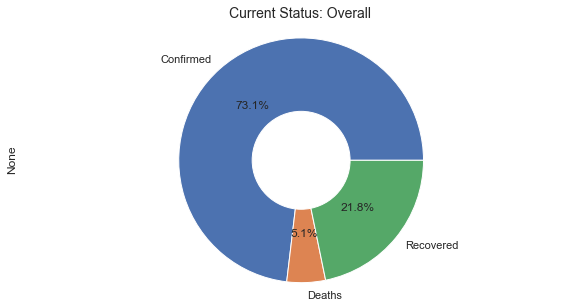

In [16]:
# pie plot for current status
fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[df["Last_Update"]==cdate.strftime('%Y-%m-%d')][cols].sum(axis = 0, skipna = True).astype(int).plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Current Status: Overall', fontsize=14)
plt.show()

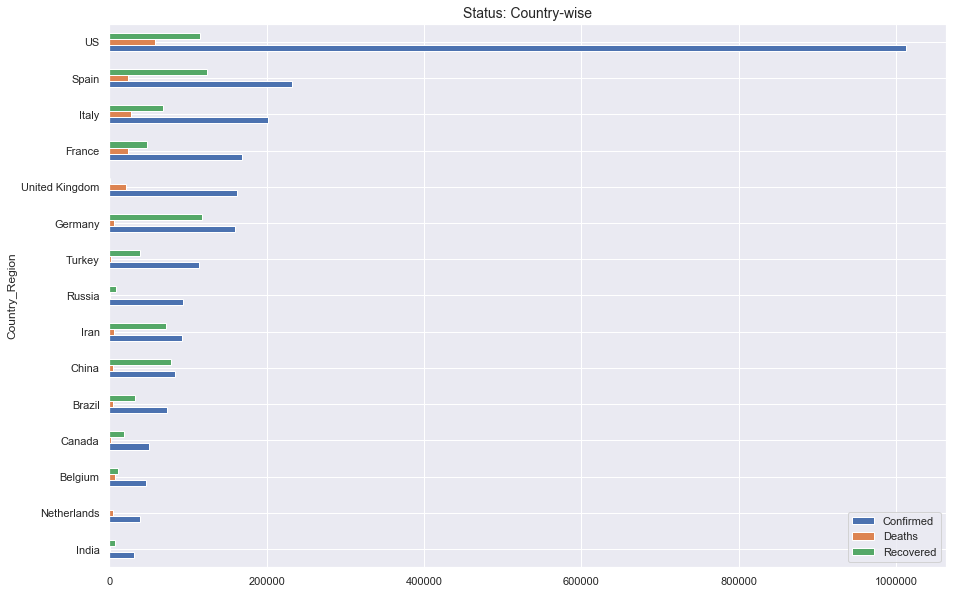

In [19]:
# bar plot for current status
tmp = df[df["Last_Update"]==cdate.strftime('%Y-%m-%d')].groupby(['Country_Region']).sum().sort_values(by=['Confirmed'], ascending=True)[-15:]
tmp.plot(kind='barh', figsize=(15,10))
plt.title('Status: Country-wise', fontsize=14)

plt.show()

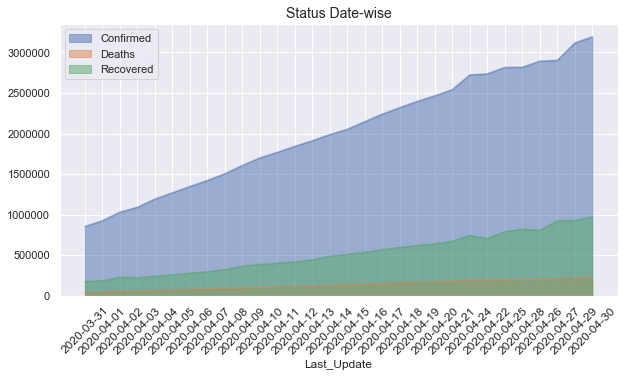

In [20]:
# Detection State-wise
tmp = df.groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()

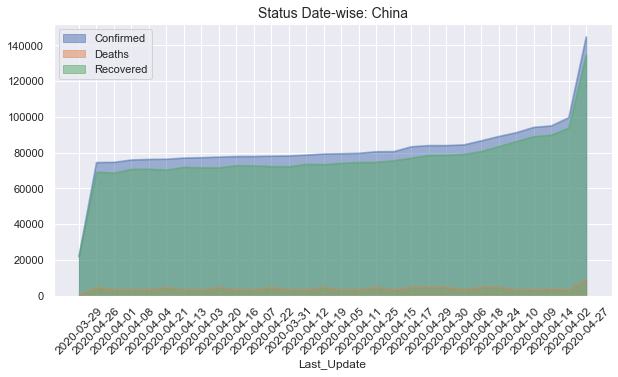

In [21]:
# Detection State-wise
tmp = df[df['Country_Region']=='China'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: China', fontsize=14)
plt.show()

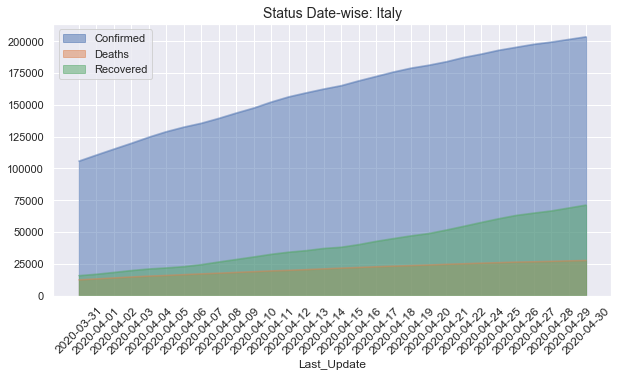

In [22]:
# Detection State-wise
tmp = df[df['Country_Region']=='Italy'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: Italy', fontsize=14)
plt.show()

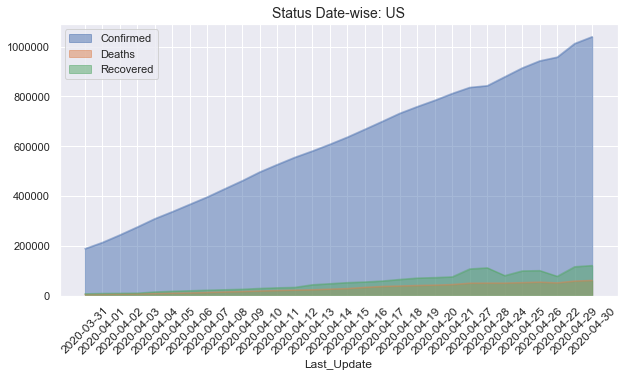

In [24]:
# Detection State-wise
tmp = df[df['Country_Region']=='US'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise: US', fontsize=14)
plt.show()

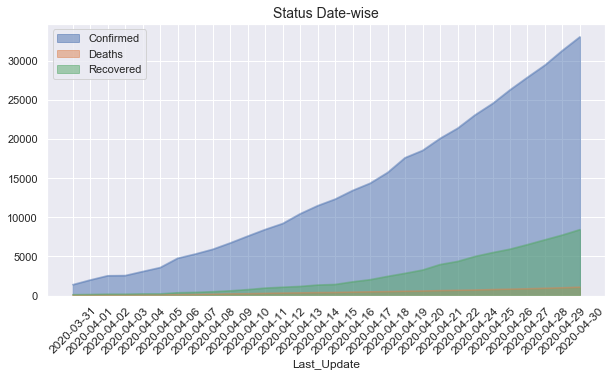

In [25]:
# Detection State-wise
tmp = df[df['Country_Region']=='India'].groupby(['Last_Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()